In [1]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import spectrogram
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fname = 'stream.mp3'
oname = 'temp.wav'

cmd = 'lame --decode {0} {1}'.format(fname, oname)
os.system(cmd)

fs, x = wav.read(oname)

In [3]:
x = x[:,0]
x.shape

(2746991,)

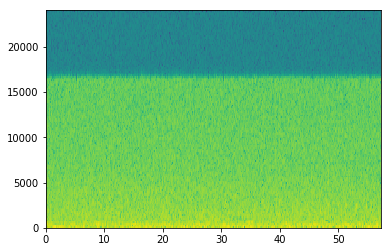

In [4]:
spec, freqs, t, im = plt.specgram(x, Fs=fs)

In [5]:
frequencies, times, spect = spectrogram(x, fs)

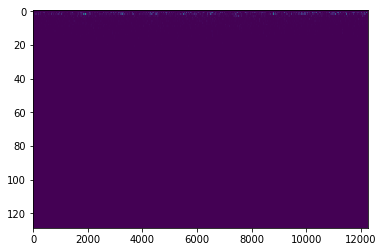

In [7]:
plt.pcolormesh(times, frequencies, spect)
plt.imshow(spect, interpolation='nearest', aspect='auto')
plt.show()

array([[1091],
       [1402],
       [1846],
       ...,
       [1692],
       [1819],
       [1757]], dtype=int16)

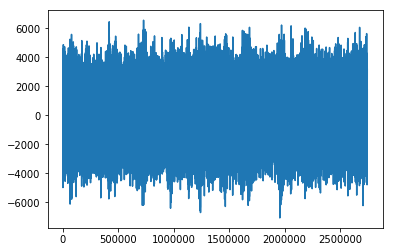

In [98]:
plt.plot(x)
x.reshape((len(x), 1))